## Annual Revenue For A Retail Shop

**AXA Mansard 3rd place solution on Advance-cross-prediction**

**Problem:** Predict the Annual Revenue a customer will generate in a year for the supermarket.

In [1]:
import os
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
dataset = 'https://www.kaggle.com/c/advance-cross-prediction/data'

In [3]:
od.download(dataset)

Skipping, found downloaded files in ".\advance-cross-prediction" (use force=True to force download)


In [4]:
os.listdir('./advance-cross-prediction')

['samplesubData.csv', 'Test.csv', 'Train.csv']

In [5]:
train = pd.read_csv('./advance-cross-prediction/Train.csv')
test = pd.read_csv('./advance-cross-prediction/Test.csv')
sample = pd.read_csv('./advance-cross-prediction/samplesubData.csv')

In [6]:
pd.set_option('display.max_columns',None)
sns.set_style('darkgrid')

### Exploratory Data Analysis & Visualization

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    304887 non-null  int64  
 1   Gender                304887 non-null  object 
 2   Age                   304887 non-null  int64  
 3   Driving_License       304887 non-null  int64  
 4   Region_Code           304887 non-null  float64
 5   Previously_Insured    304887 non-null  int64  
 6   Vehicle_Age           304887 non-null  object 
 7   Vehicle_Damage        304887 non-null  object 
 8   Policy_Sales_Channel  304887 non-null  float64
 9   Vintage               304887 non-null  int64  
 10  Annual_Premium        304887 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 25.6+ MB


In [8]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium
0,274711,Male,22,1,40.0,0,< 1 Year,Yes,152.0,203,25455.0
1,216540,Female,26,1,8.0,1,< 1 Year,No,26.0,45,38393.0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76222 entries, 0 to 76221
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    76222 non-null  int64  
 1   Gender                76222 non-null  object 
 2   Age                   76222 non-null  int64  
 3   Driving_License       76222 non-null  int64  
 4   Region_Code           76222 non-null  float64
 5   Previously_Insured    76222 non-null  int64  
 6   Vehicle_Age           76222 non-null  object 
 7   Vehicle_Damage        76222 non-null  object 
 8   Policy_Sales_Channel  76222 non-null  float64
 9   Vintage               76222 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 5.8+ MB


In [10]:
test.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage
0,16222,Male,54,1,28.0,0,> 2 Years,Yes,26.0,53
1,342481,Female,26,1,3.0,0,1-2 Year,Yes,156.0,280


2. __Descriptive Stats Of Each Dataset__

In [11]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Vintage,Annual_Premium
count,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000
mean,190738.657112,38.826897,0.997855,26.396239,0.458127,112.053859,154.392214,30591.308311
std,110004.367239,15.515299,0.046265,13.228749,0.498244,54.189288,83.670312,17239.285689
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,10.000000,2630.000000
25%,95504.500000,25.000000,1.000000,15.000000,0.000000,29.000000,82.000000,24403.000000
50%,190886.000000,36.000000,1.000000,28.000000,0.000000,134.000000,154.000000,31697.000000
75%,285863.500000,49.000000,1.000000,35.000000,1.000000,152.000000,227.000000,39443.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,163.000000,299.000000,540165.000000


In [12]:
train.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,304887,304887,304887
unique,2,3,2
top,Male,1-2 Year,Yes
freq,164780,160195,153959


In [13]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Vintage
count,76222.000000,76222.000000,76222.000000,76222.000000,76222.000000,76222.000000,76222.000000
mean,189820.373960,38.805332,0.997927,26.359083,0.458542,111.956036,154.168127
std,110064.355107,15.496940,0.045482,13.234487,0.498282,54.263069,83.675579
min,3.000000,20.000000,0.000000,0.000000,0.000000,1.000000,10.000000
25%,94494.000000,25.000000,1.000000,15.000000,0.000000,26.000000,82.000000
50%,189227.000000,36.000000,1.000000,28.000000,0.000000,131.000000,154.000000
75%,285698.750000,49.000000,1.000000,35.000000,1.000000,152.000000,227.000000
max,381105.000000,85.000000,1.000000,52.000000,1.000000,163.000000,299.000000


In [14]:
test.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,76222,76222,76222
unique,2,3,2
top,Male,1-2 Year,Yes
freq,41309,40121,38454


3. __Data Visualization__

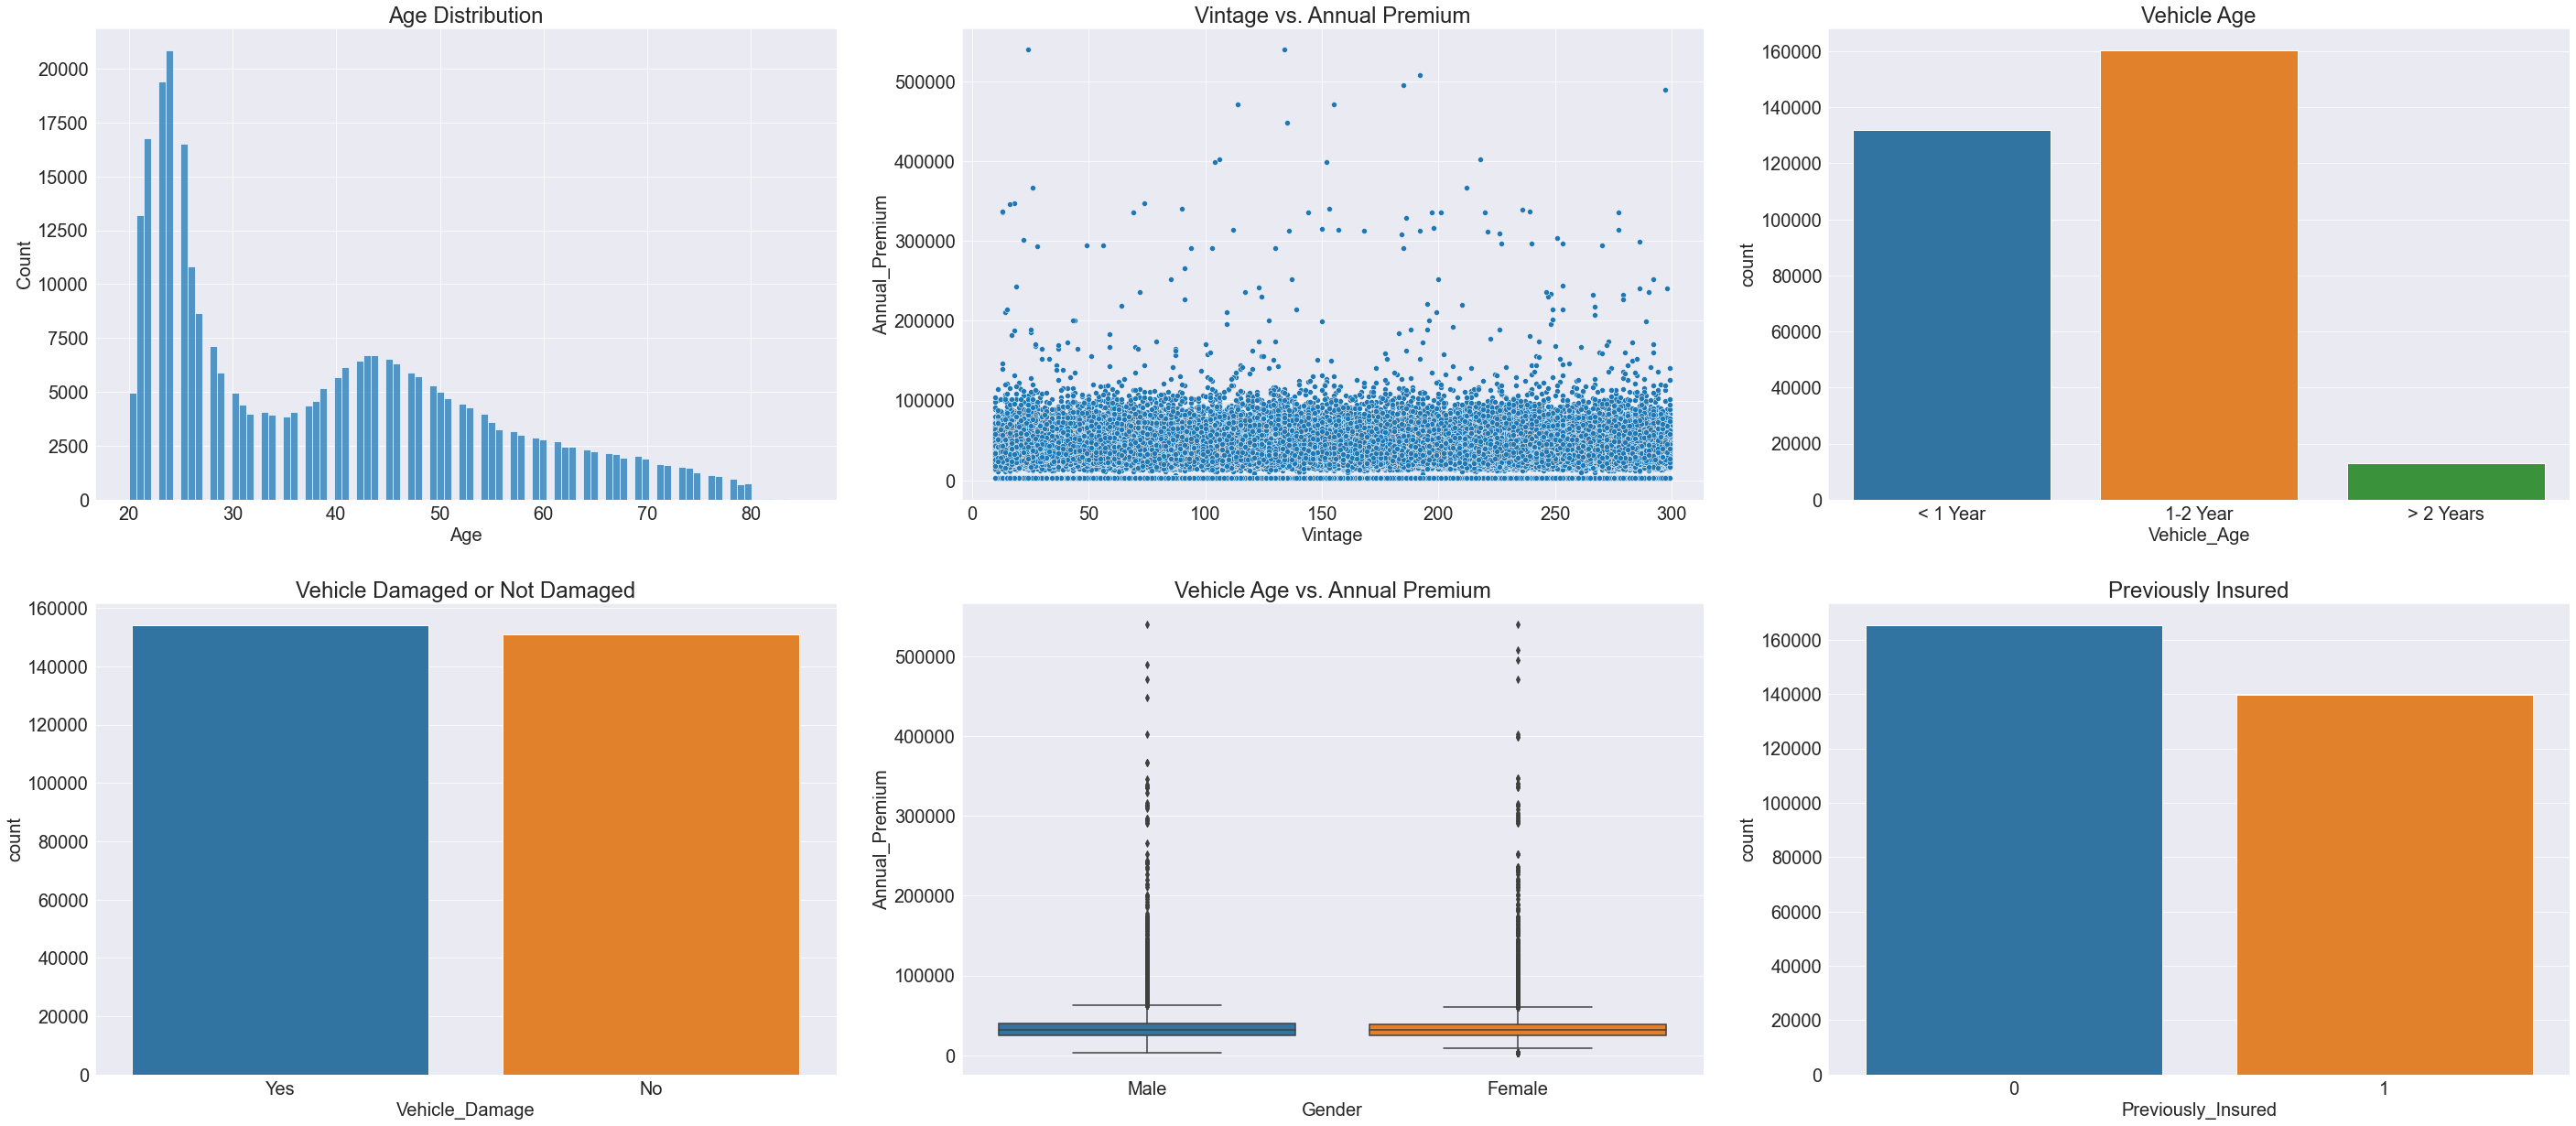

In [15]:
matplotlib.rcParams['font.size'] = 20
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(40,18))

axes[0,0].set_title('Age Distribution')
sns.histplot(data=train, x='Age', ax=axes[0,0])

axes[0,1].set_title('Vintage vs. Annual Premium')
sns.scatterplot(data=train, x= 'Vintage', y='Annual_Premium',ax=axes[0,1])

axes[0,2].set_title('Vehicle Age')
sns.countplot(data=train, x='Vehicle_Age', ax=axes[0,2])

axes[1,0].set_title('Vehicle Damaged or Not Damaged')
sns.countplot(data=train, x='Vehicle_Damage', ax=axes[1,0])

axes[1,1].set_title('Vehicle Age vs. Annual Premium')
sns.boxplot(data=train, x='Gender', y='Annual_Premium',ax=axes[1,1])

axes[1,2].set_title('Previously Insured')
sns.countplot(data=train, x='Previously_Insured',ax=axes[1,2])

plt.tight_layout(pad=2)

Text(0.5, 1.0, 'Distribution of Annual Premium')

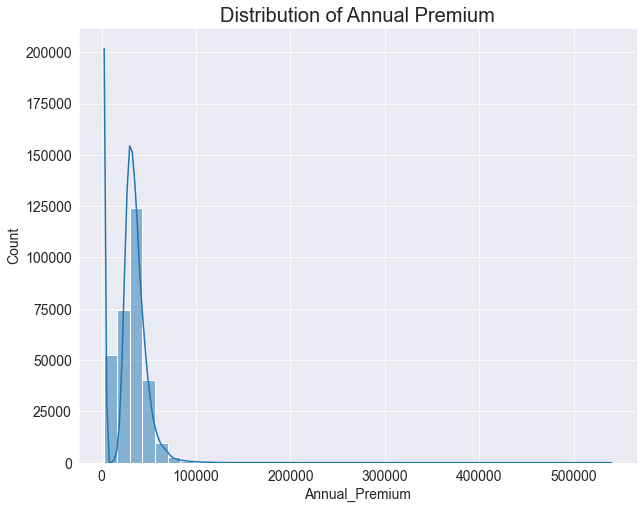

In [16]:
plt.figure(figsize=(10,8))
matplotlib.rcParams['font.size'] = 14
sns.histplot(train['Annual_Premium'], kde=True, bins=40)
plt.title('Distribution of Annual Premium',fontsize=20)

As seen above on the histogram plot, our Target variable `Annual Premium` is right-skewed; which means that `skewness > 0`. This occurs when there are outliers that can't be filtered out as they are important to the model. We'll be using log-transform in an atempt to reduce the skweness and make it symetrical.

### Preprocesing

1. __Checking & Removing Duplicate Rows In Train Data__

In [17]:
def remove_duplicate(data):
    print('No. of Rows - Before Removing Duplicates: ', data.shape[0])
    data.drop_duplicates(keep='first', inplace=True)
    print('No. of Rows - After Removing Duplicates: ', data.shape[0])
    return data

In [18]:
train = remove_duplicate(train)

No. of Rows - Before Removing Duplicates:  304887
No. of Rows - After Removing Duplicates:  304887


There's no duplicate in our train data

2. __Checking & Filling Missing Values__

In [19]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Policy_Sales_Channel    0
Vintage                 0
Annual_Premium          0
dtype: int64

In [20]:
test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

There's no missing value in the data

### Feature Enginerring

1. __Indemnity__

In [21]:
def get_claim(data):
    if data['Previously_Insured'] == 1 and data['Vehicle_Damage'] == 'Yes':
        return 1
    else:
        return 0

In [22]:
train['Indemnity'] = train.apply(lambda x: get_claim(x), axis=1)
test['Indemnity'] = test.apply(lambda x: get_claim(x), axis=1)

2. __Converting Objects to Integer__

Gender, Vehicle_Age, & Vehicle_Damage

In [23]:
train['Vehicle_Age'].value_counts()

1-2 Year     160195
< 1 Year     131852
> 2 Years     12840
Name: Vehicle_Age, dtype: int64

In [24]:
train['Vehicle_Age'] = train['Vehicle_Age'].replace({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
test['Vehicle_Age'] = test['Vehicle_Age'].replace({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

In [25]:
train['Gender'].value_counts()

Male      164780
Female    140107
Name: Gender, dtype: int64

In [26]:
train['Gender'] = train['Gender'].replace({'Male':1,'Female':0})
test['Gender'] = test['Gender'].replace({'Male':1,'Female':0})

In [27]:
train['Vehicle_Damage'].value_counts()

Yes    153959
No     150928
Name: Vehicle_Damage, dtype: int64

In [28]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].replace({'Yes': 1, 'No':0})
test['Vehicle_Damage'] = test['Vehicle_Damage'].replace({'Yes': 1, 'No': 0})

3. __Vehicle Damage Due To Driver's Age__

In [29]:
train['Vehicle_Damage_per_Age'] = train.groupby(['Region_Code','Age'])['Vehicle_Age'].transform('sum')
test['Vehicle_Damage_per_Age'] = test.groupby(['Region_Code','Age'])['Vehicle_Age'].transform('sum')

4. __Customer Loyalty In A Year__

In [30]:
train['Customer_Loyalty'] = train['Vintage']/365
test['Customer_Loyalty'] = test['Vintage']/365

5. __Vehicle Damage per Sales Channel__

In [31]:
train['Vehicle_Damage_per_Sales_Policy_Channel'] = train.groupby(['Region_Code','Vehicle_Age'])['Policy_Sales_Channel'].transform('sum')
test['Vehicle_Damage_per_Sales_Policy_Channel'] = test.groupby(['Region_Code','Vehicle_Age'])['Policy_Sales_Channel'].transform('sum')

6. __Vehicle Damage due to Vehicle's Age__

In [32]:
train['Vehicle_Damage_per_Vehicle_Age'] = train.groupby(['Region_Code','Vehicle_Age'])['Vehicle_Damage'].transform('sum')
test['Vehicle_Damage_per_Vehicle_Age'] = test.groupby(['Region_Code','Vehicle_Age'])['Vehicle_Damage'].transform('sum')

7. __Old Vehicle__

I created a new column, `Old Vehicle`: If Vehicle_Age is 2 (recall it's same as: `Vehicle_Age > 2 Years`) and Vehicle is damaged (`Vehicle_Damage == 1 or Yes`) then we classify such vehicle as an old vehicle.

In [33]:
train.loc[(train['Vehicle_Age'] == 2) & (train['Vehicle_Damage'] == 1), 'Old_Vehicle']=1
train.loc[(train['Vehicle_Age']!=2) & (train['Vehicle_Damage']==0), 'Old_Vehicle'] = 0
freq1 = train.groupby(['Old_Vehicle']).size()/len(train)
train['Old_Vehicle'] = train['Old_Vehicle'].map(freq1)
train['Old_Vehicle'].fillna(0, inplace =True)


test.loc[(test['Vehicle_Age'] == 2) & (test['Vehicle_Damage'] == 1), 'Old_Vehicle']=1
test.loc[(train['Vehicle_Age']!=2) & (test['Vehicle_Damage']==0), 'Old_Vehicle'] = 0
freq2 = test.groupby(['Old_Vehicle']).size()/len(test)
test['Old_Vehicle'] = test['Old_Vehicle'].map(freq2)
test['Old_Vehicle'].fillna(0, inplace =True)

In [34]:
train['Old_Vehicle'].value_counts()

0.494990    150916
0.000000    141143
0.042075     12828
Name: Old_Vehicle, dtype: int64

8. __Vehicle Damage by Region Code__

In [35]:
train['Vehicle_Damage_per_Region_Code'] = train.groupby(['Vehicle_Damage'])['Region_Code'].transform('sum')
test['Vehicle_Damage_per_Region_Code'] = test.groupby(['Vehicle_Damage'])['Region_Code'].transform('sum')

9. __Log Transformation of Target Column__

Skewness is a measure of symmetry or we can say it's also a measure for lack of symmetry, and sometimes this concept is used for checking lack of Normality assumption of Linear Regression. As highlighted previously at the visualization segment, our target column is right skewed so I'll transform the target column using `Log Transformation` technique.

In [36]:
train['Annual_Premium'] = np.log(train['Annual_Premium'])

Text(0.5, 1.0, 'Distribution of Transformed Annual Premium')

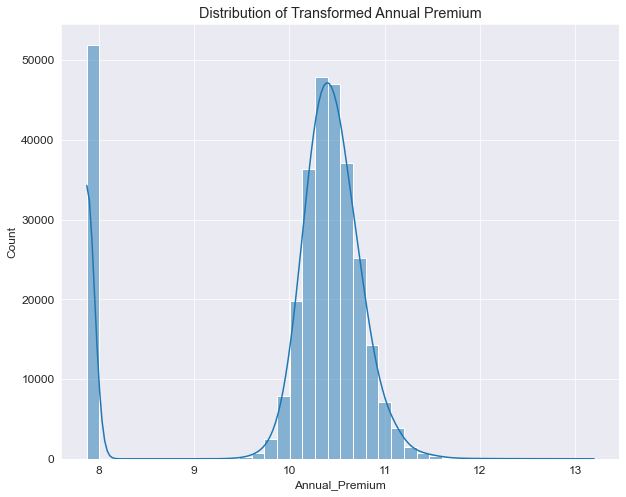

In [37]:
plt.figure(figsize=(10,8))
matplotlib.rcParams['font.size'] = 12
sns.histplot(train['Annual_Premium'], kde=True, bins=40)
plt.title('Distribution of Transformed Annual Premium')

As seen above, the log transformation worked well on our positively skewed continuous target column. We've been able to transform the data to become more symmetric in shape, thus `Annual Premium` is looking more like it follows a normal distribution.

### Input Features and Target  Label Selection

In [38]:
input_col = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
             'Policy_Sales_Channel', 'Vintage', 'Indemnity','Vehicle_Damage_per_Age','Customer_Loyalty',
             'Vehicle_Damage_per_Sales_Policy_Channel','Vehicle_Damage_per_Vehicle_Age', 'Old_Vehicle',
             'Vehicle_Damage_per_Region_Code']

target = 'Annual_Premium'

In [39]:
train_input = train[input_col].copy()
test_input = test[input_col].copy()
train_target = train[target]

**Extracting Numeric & Categorical Features**

Let's also identify numeric and categorical columns in our input col. We already have some binary categorical columns in (0/1) so we can treat them as a numeric columns.

In [40]:
num_col = ['Gender','Age','Driving_License','Previously_Insured','Vehicle_Damage','Vintage','Indemnity','Vehicle_Damage_per_Age',
           'Customer_Loyalty','Vehicle_Damage_per_Sales_Policy_Channel','Vehicle_Damage_per_Vehicle_Age','Vehicle_Age',
           'Old_Vehicle','Vehicle_Damage_per_Region_Code']

cat_col = ['Policy_Sales_Channel','Region_Code']

### Encoding and Scaling 

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
scaler.fit(train_input[num_col])

StandardScaler()

In [44]:
train_input[num_col] = scaler.transform(train_input[num_col])
test_input[num_col] = scaler.transform(test_input[num_col])

In [45]:
encoder = LabelEncoder()

In [46]:
for i in cat_col:
    train_input[i] = encoder.fit_transform(train_input[i])
    test_input[i] = encoder.fit_transform(test_input[i])

### Merging Back Scaled Numeric & Encoded Categorical Features

In [47]:
train_df = train_input[num_col + cat_col]
test_df = test_input[num_col + cat_col]

train_df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Vintage,Indemnity,Vehicle_Damage_per_Age,Customer_Loyalty,Vehicle_Damage_per_Sales_Policy_Channel,Vehicle_Damage_per_Vehicle_Age,Vehicle_Age,Old_Vehicle,Vehicle_Damage_per_Region_Code,Policy_Sales_Channel,Region_Code
0,0.922099,-1.084538,0.046365,-0.919484,0.990108,0.580945,-0.163044,-0.560091,0.580945,-0.810299,-0.630266,-1.07403,-1.003728,0.990108,144,40
1,-1.084482,-0.826727,0.046365,1.087566,-1.009991,-1.307422,-0.163044,-0.533147,-1.307422,0.167459,-0.457634,-1.07403,1.009500,-1.009991,24,8
2,-1.084482,-0.440011,0.046365,-0.919484,0.990108,-1.426939,-0.163044,-0.080717,-1.426939,0.299989,-0.304378,-1.07403,-1.003728,0.990108,117,28
3,0.922099,-0.440011,0.046365,-0.919484,0.990108,0.724365,-0.163044,-0.554477,0.724365,-0.607295,-0.562903,-1.07403,-1.003728,0.990108,144,37
4,-1.084482,-0.955632,0.046365,-0.919484,0.990108,0.808027,-0.163044,-0.414146,0.808027,0.299989,-0.304378,-1.07403,-1.003728,0.990108,148,28


### Spliting Train Data into Train and Validation Data

In [48]:
X = train_df
y= train_target

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [51]:
print('X_train Shape: {}'.format(X_train.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('X_val Shape: {}'.format(X_val.shape))
print('Y_val Shape: {}'.format(Y_val.shape))

X_train Shape: (243909, 16)
Y_train Shape: (243909,)
X_val Shape: (60978, 16)
Y_val Shape: (60978,)


### Saving Preprocessed Data

In [52]:
X_train.to_csv('X_train.csv',index=False)
Y_train.to_csv('Y_train.csv',index=False)

X_val.to_csv('X_val.csv',index=False)
Y_val.to_csv('Y_val.csv',index=False)

test_input.to_csv('test_input.csv', index=False)

### Training The Model

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
def evaluate(train_x, train_y, val_x, val_y, model):
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    val_pred = model.predict(val_x)
    rmse_train = np.sqrt(mean_squared_error(train_pred, train_y))
    rmse_val = np.sqrt(mean_squared_error(val_pred, val_y))
    print('Train RMSE : {}'.format(rmse_train))
    print('Validation RMSE : {}'.format(rmse_val))

**Creating A Baseline Model**

#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rfmodel = RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42)

In [57]:
evaluate(X_train, Y_train, X_val, Y_val, rfmodel)

Train RMSE : 0.3714680165430004
Validation RMSE : 0.897599011802531


#### XGBoost 

In [58]:
from xgboost import XGBRegressor

In [59]:
xgbmodel = XGBRegressor(n_jobs=-1, max_depth =4, n_estimators=100, random_state=42)

In [60]:
evaluate(X_train, Y_train, X_val, Y_val, xgbmodel)

Train RMSE : 0.8232771199354861
Validation RMSE : 0.8281870387108822


#### LigthGBM

In [61]:
import yaml  
yaml.warnings({'YAMLLoadWarning': False})

import warnings
warnings.filterwarnings('ignore')

In [62]:
from lightgbm import LGBMRegressor

In [63]:
lgbmodel = LGBMRegressor(n_estimators=200, max_depth=8,  bagging_fraction= 0.1, num_leaves = 200, random_state=42, n_jobs=-1)

In [64]:
evaluate(X_train, Y_train, X_val, Y_val, lgbmodel)

[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
Train RMSE : 0.7977024427562814
Validation RMSE : 0.8303247839388971


#### CatBoost

In [65]:
from catboost import CatBoostRegressor

In [66]:
cbmodel = CatBoostRegressor(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=4)

In [67]:
evaluate(X_train, Y_train, X_val, Y_val, cbmodel)

0:	learn: 0.9873528	total: 1.85s	remaining: 3m 3s
1:	learn: 0.9726896	total: 2.01s	remaining: 1m 38s
2:	learn: 0.9610080	total: 2.18s	remaining: 1m 10s
3:	learn: 0.9507887	total: 2.27s	remaining: 54.6s
4:	learn: 0.9392833	total: 2.39s	remaining: 45.3s
5:	learn: 0.9313336	total: 2.5s	remaining: 39.1s
6:	learn: 0.9248801	total: 2.61s	remaining: 34.7s
7:	learn: 0.9170454	total: 2.71s	remaining: 31.1s
8:	learn: 0.9119472	total: 2.8s	remaining: 28.3s
9:	learn: 0.9059942	total: 2.91s	remaining: 26.2s
10:	learn: 0.9021080	total: 2.98s	remaining: 24.2s
11:	learn: 0.8975325	total: 3.08s	remaining: 22.6s
12:	learn: 0.8947307	total: 3.15s	remaining: 21.1s
13:	learn: 0.8908883	total: 3.24s	remaining: 19.9s
14:	learn: 0.8887130	total: 3.35s	remaining: 19s
15:	learn: 0.8853173	total: 3.48s	remaining: 18.2s
16:	learn: 0.8836428	total: 3.59s	remaining: 17.5s
17:	learn: 0.8810932	total: 3.71s	remaining: 16.9s
18:	learn: 0.8797420	total: 3.81s	remaining: 16.2s
19:	learn: 0.8776004	total: 3.92s	remaining

### Hyperparameter Tunning With GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

In [130]:
param = {
    'n_estimators': [200,300],
    'max_depth': [6,7],
    'learning_rate':[0.025, 0.1],
    'booster':['gblinear'],
    'subsample':[0.9],
    'colsample_bytree':[0.7],
    'min_child_weight': [4],
    'objective': ['reg:squarederror'],
    'scoring': ['neg_mean_squared_error'],
    'nthread': [4]
}

In [131]:
xgb_grid = GridSearchCV(xgbmodel, param_grid = param, cv=5)

In [132]:
%%time
xgb_grid.fit(X_train, Y_train)

[23:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "scoring", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "scoring", "subsample", "tree_method" } might not be used.

  This may not be accur

[23:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "scoring", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "scoring", "subsample", "tree_method" } might not be used.

  This may not be accur

[23:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "scoring", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "scoring", "subsample", "tree_method" } might not be used.

  This may not be accur

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=4, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel...
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             param_grid={'

In [133]:
print('Tunned XGBRegressor Parameters: {}'.format(xgb_grid.best_params_))

print('XGBRegressor Best Score: {}'.format(xgb_grid.best_score_))

Tunned XGBRegressor Parameters: {'booster': 'gblinear', 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 300, 'nthread': 4, 'objective': 'reg:squarederror', 'scoring': 'neg_mean_squared_error', 'subsample': 0.9}
XGBRegressor Best Score: -0.019451397390842784


In [134]:
val_pred = xgb_grid.predict(X_val)
np.sqrt(mean_squared_error(Y_val, val_pred))

1.0180995326454712

In [135]:
_pred = xgb_grid.predict(test_df)

In [136]:
_pred

array([9.687967, 9.719025, 9.930334, ..., 9.770969, 9.926594, 9.502216],
      dtype=float32)

### Submission

In [137]:
id = test_input['id']
submission = pd.DataFrame({'id': id, 'Annual_Premium': _pred})
submission.to_csv('kwope_submission.csv',index=False)

In [138]:
submission.head()

,id,Annual_Premium
0,16222,9.687967
1,342481,9.719025
2,20916,9.930334
3,38704,9.970335
4,363809,9.636335


In [81]:
submission.shape

(76222, 2)

## Tunning Hyperparameter For LightGBM

In [158]:
param = {
    'learning_rate': [0.025, 0.1],
    'bagging_fraction': [0.1],
    'num_iterations': [300, 380],
    'colsample_bytree': [0.7],
    'num_leaves': [300],
    'max_depth': [7,8],
    'objective': ['regression'],
    'metric':['RMSE']
}    

In [159]:
lgbm_grid = GridSearchCV(lgbmodel, n_jobs=-1, param_grid = param, cv=5)

In [160]:
%%time
lgbm_grid.fit(X_train, Y_train)

[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=0.9 will be ignored. Current value: bagging_fraction=0.1
Wall time: 1h 14min 10s


GridSearchCV(cv=5,
             estimator=LGBMRegressor(bagging_fraction=0.1, max_depth=8,
                                     n_estimators=200, num_leaves=200,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.1],
                         'colsample_bytree': [0.7, 0.9],
                         'learning_rate': [0.025, 0.1], 'max_depth': [7, 8],
                         'metric': ['RMSE'], 'num_iterations': [300, 380],
                         'num_leaves': [300], 'objective': ['regression'],
                         'subsample': [0.9, 1]})

In [165]:
print('Tunned LGBMRegressor Parameters: {}'.format(lgbm_grid.best_params_))

print('LGBMRegressor Best Score: {}'.format(lgbm_grid.best_score_))

Tunned LGBMRegressor Parameters: {'bagging_fraction': 0.1, 'colsample_bytree': 0.7, 'learning_rate': 0.025, 'max_depth': 7, 'metric': 'RMSE', 'num_iterations': 380, 'num_leaves': 300, 'objective': 'regression', 'subsample': 0.9}
LGBMRegressor Best Score: 0.32060855303005675


In [162]:
val_pred = lgbm_grid.predict(X_val)
np.sqrt(mean_squared_error(Y_val, val_pred))

0.8274899275883509

In [154]:
_pred2 = lgbm_grid.predict(test_df)

In [155]:
_pred2

array([ 9.43424597,  9.87487405,  9.99491003, ..., 10.14372135,
       10.0092722 ,  9.91890271])

In [156]:
id = test_input['id']
submission2 = pd.DataFrame({'id': id, 'Annual_Premium': _pred2})
submission2.to_csv('kwope_submission2.csv',index=False)

In [157]:
submission2.head()

,id,Annual_Premium
0,16222,9.434246
1,342481,9.874874
2,20916,9.994910
3,38704,9.543676
4,363809,9.945041


#### Taking The Log Inverse Of The Predicion

To get back the actual predicted value, we'll have to convert the prediction from log to its actual value. We can do this by calculating the log inverse of `_pred`

In [82]:
converted_pred = [np.exp(x) for x in _pred]

In [164]:
pd.DataFrame({'id': test_input['id'], 'Annual_Premium': converted_pred})

,id,Annual_Premium
0,16222,5931.379883
1,342481,5909.940430
2,20916,11011.462891
3,38704,17379.476562
4,363809,3102.127930
...,...,...
76217,151615,17611.160156
76218,170171,36384.382812
76219,303222,5836.371094
76220,333830,8513.917969
